# **Curso** : Python para Data Science

**Sesión 06**
Clustering

**Profesor**:
* Ing. Cristhian Castro Chávez
* castro.ca@pucp.pe

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.cluster import KMeans
#para escalar los datos usando z-score
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

## Clustering usando K-Means

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

Comenzaremos con un dataset sencillo. Ejemplo de clusterización en conjunto de datos iris. Se realiza el ajuste del modelo con diferentes valores de k. La gráfica de la inercia muestra cómo esta se reduce a medida que aumenta el valor de k.

## Dataset Iris

In [2]:
iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

## Método de Elbow - Validando la inercia

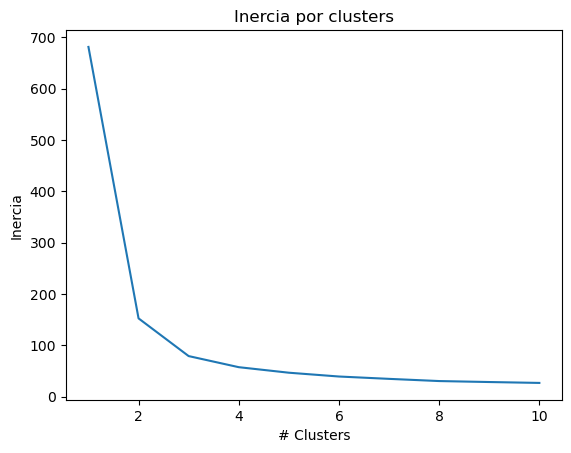

In [3]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Calculamos las inercias
inertias = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, max_iter = 100, n_init = 10, random_state = 42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

plt.plot(range(1, 11), inertias)
plt.title('Inercia por clusters')
plt.xlabel('# Clusters')
plt.ylabel('Inercia')
plt.show()

A partir de k = 3 no aumenta mucho la inercia por lo que este es un valor adecuado para el número de clusters.

In [4]:
kmeans = KMeans(n_clusters = 3, max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)  # etiquetas
print("Inercia: ", kmeans.inertia_)

Inercia:  78.85144142614601


Visualizamos los clusters respecto a las dos primeras características.

In [5]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [6]:
# centroides
kmeans.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [7]:
# etiquetas
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [8]:
# etiquetas
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [9]:
len(X), len(kmeans.labels_), len(y_kmeans)

(150, 150, 150)

Visualizamos los clusters respecto a las dos primeras características (columna 0 y 1).

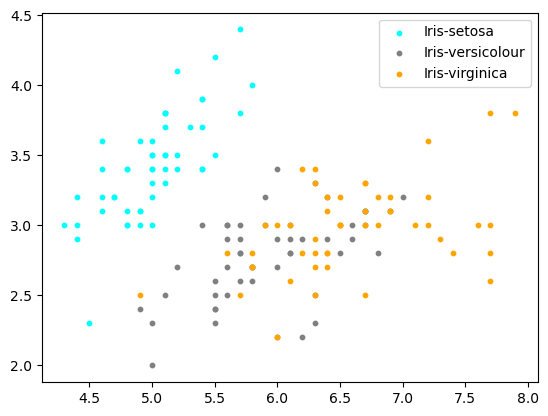

In [10]:
#plt.rcParams["figure.figsize"] = (10,8)
plt.scatter(X[y == 0, 0], X[y == 0, 1], s = 10, c = 'cyan', label = 'Iris-setosa')
plt.scatter(X[y == 1, 0], X[y == 1, 1], s = 10, c = 'gray', label = 'Iris-versicolour')
plt.scatter(X[y == 2, 0], X[y == 2, 1], s = 10, c = 'orange', label = 'Iris-virginica')

plt.legend();

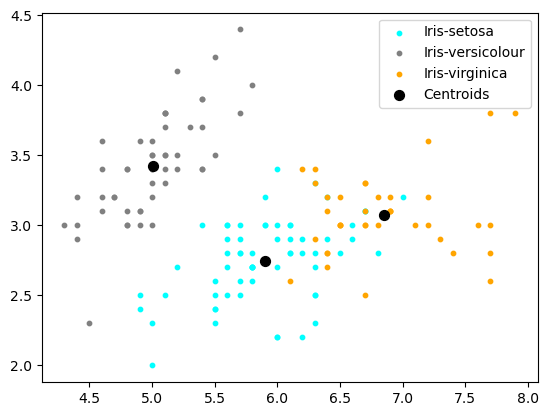

In [11]:
#plt.rcParams["figure.figsize"] = (10,8)
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 10, c = 'cyan', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 10, c = 'gray', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 10, c = 'orange', label = 'Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'black', label = 'Centroids')

plt.legend();  # ; al final es igual a plt.show()

Visualizamos los clusters respecto a las otras dos características (columna 2 y 3).

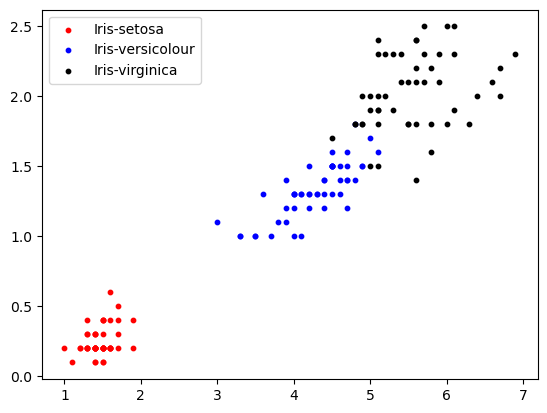

In [12]:
plt.scatter(X[y == 0, 2], X[y == 0, 3], s = 10, c = 'red', label = 'Iris-setosa')
plt.scatter(X[y == 1, 2], X[y == 1, 3], s = 10, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[y == 2, 2], X[y == 2, 3], s = 10, c = 'black', label = 'Iris-virginica')

plt.legend();  # ; al final es igual a plt.show()

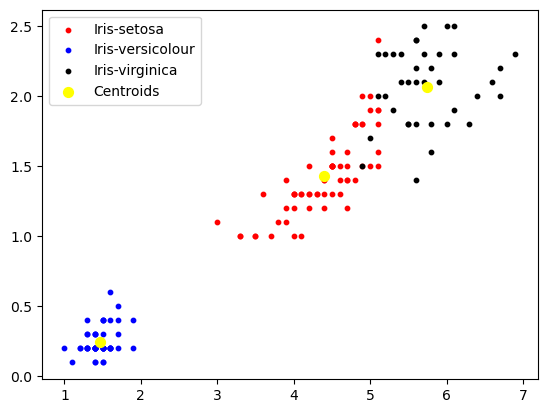

In [13]:
plt.scatter(X[y_kmeans == 0, 2], X[y_kmeans == 0, 3], s = 10, c = 'red', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 2], X[y_kmeans == 1, 3], s = 10, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 2], X[y_kmeans == 2, 3], s = 10, c = 'black', label = 'Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3], s = 50, c = 'yellow', label = 'Centroids')

plt.legend();  # ; al final es igual a plt.show()

## Score de silueta – Validando la inercia

In [14]:
# Calculamos las inercias
"""
inertias = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, max_iter = 100, n_init = 10, random_state = 42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)
"""

# Generamos algoritmos K means para K de 1 a 10. Almacenamos su inercia en una lista
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

In [15]:
kmeans_per_k

[KMeans(n_clusters=1, random_state=42),
 KMeans(n_clusters=2, random_state=42),
 KMeans(n_clusters=3, random_state=42),
 KMeans(n_clusters=4, random_state=42),
 KMeans(n_clusters=5, random_state=42),
 KMeans(n_clusters=6, random_state=42),
 KMeans(n_clusters=7, random_state=42),
 KMeans(random_state=42),
 KMeans(n_clusters=9, random_state=42)]

In [16]:
# Todas las filas desde la fila 1
kmeans_per_k[1:]

[KMeans(n_clusters=2, random_state=42),
 KMeans(n_clusters=3, random_state=42),
 KMeans(n_clusters=4, random_state=42),
 KMeans(n_clusters=5, random_state=42),
 KMeans(n_clusters=6, random_state=42),
 KMeans(n_clusters=7, random_state=42),
 KMeans(random_state=42),
 KMeans(n_clusters=9, random_state=42)]

In [17]:
# Score de silueta – Validando la inercia
from sklearn.metrics import silhouette_score
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

In [18]:
silhouette_scores

[0.6810461692117462,
 0.5528190123564095,
 0.49805050499728737,
 0.4887488870931056,
 0.36483400396700255,
 0.349748162116121,
 0.35745369258527165,
 0.33944886363936994]

0.6810461692117462
0.5528190123564095
0.49805050499728737
0.4887488870931056
0.36483400396700255
0.349748162116121
0.35745369258527165
0.33944886363936994


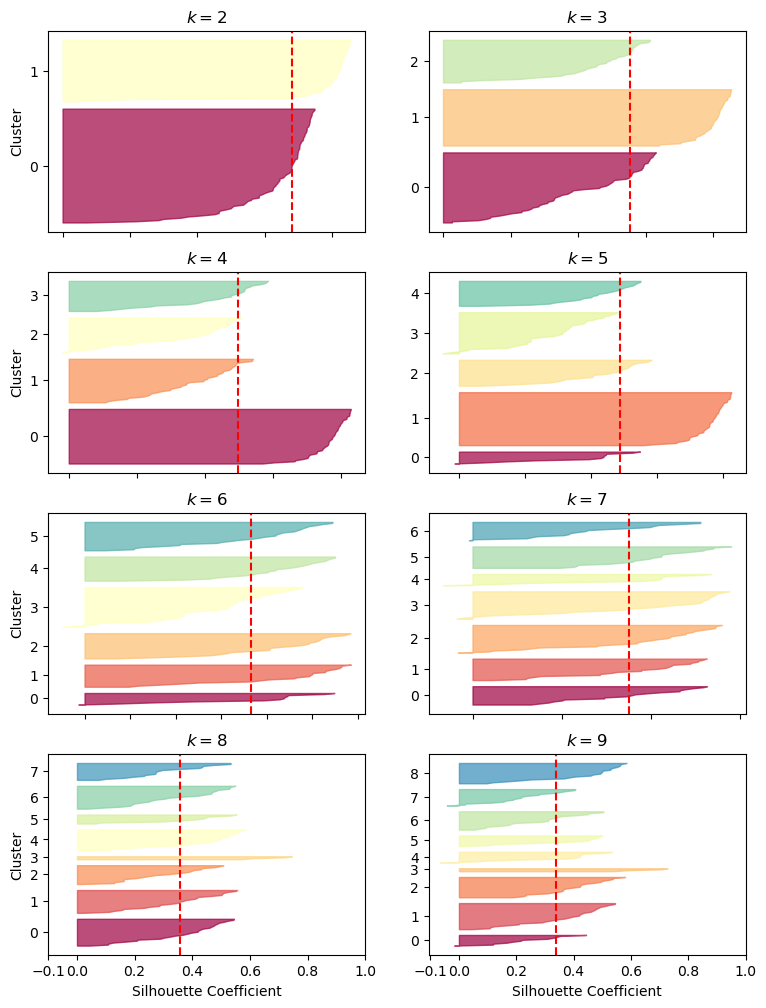

In [19]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib as mpl

plt.figure(figsize=(9,12))

for k in (2, 3, 4, 5, 6, 7, 8, 9):
    plt.subplot(4, 2, k - 1)

    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (2, 4, 6, 8):
        plt.ylabel("Cluster")

    if k in (8, 9):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    print(silhouette_scores[k - 2])
    plt.title("$k={}$".format(k), fontsize=12)

plt.show()

En el caso de Iris podemos observar que hay un cluster bien definido y los otros dos clusters no tienen mucha separación. El cluster Versicolor destaca como un buen cluster para los 4 valores de k. Los otros dos clusters apenas pasan la linea roja para k=3 y tienen un peor desempeño para el resto de valores de k.

Veamos otro ejemplo, usando la función make_blobs de sklear.datasets. En este caso creamos muestras de en el espacio bidimensional, con 4 clusters generados aleatoriamente. Revisemos el score de siluetas para esta distribución de datos:

## Dataset Blobs

In [20]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from sklearn.datasets import make_blobs

# Generando data de ejemplo usando blobs
# El conjunto de datos tiene 3 clusters juntos y uno alejado
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)

X, y

(array([[-6.92324165e+00, -1.06695320e+01],
        [-8.63062033e+00, -7.13940564e+00],
        [-9.63048069e+00, -2.72044935e+00],
        [-2.30647659e+00,  5.30797676e+00],
        [-7.57005366e+00, -3.01446491e+00],
        [-1.00051011e+00,  2.77905153e+00],
        [-4.81826839e+00, -2.77214822e+00],
        [-5.33964799e+00, -1.27625764e+00],
        [-7.94308840e+00, -3.89993901e+00],
        [-5.54924525e+00, -3.41298968e+00],
        [-5.14508990e+00, -9.54492198e+00],
        [-7.09669936e+00, -8.04074036e+00],
        [-5.82641512e+00, -1.96346196e+00],
        [-1.83198811e+00,  3.52863145e+00],
        [-7.34267235e+00, -3.16546482e+00],
        [-7.34072825e+00, -6.92427252e+00],
        [-7.94653906e+00, -3.36768655e+00],
        [-8.24598536e+00, -8.61315821e+00],
        [-1.98197711e+00,  4.02243551e+00],
        [-4.35098035e+00, -3.69476678e+00],
        [-1.04768696e+01, -3.60318139e+00],
        [-1.10195984e+01, -3.15882031e+00],
        [-5.17255904e+00, -4.318

Para n_clusters = 2 El score de silueta promedio es : 0.7049787496083262
Para n_clusters = 3 El score de silueta promedio es : 0.5882004012129721
Para n_clusters = 4 El score de silueta promedio es : 0.6505186632729437
Para n_clusters = 5 El score de silueta promedio es : 0.56376469026194
Para n_clusters = 6 El score de silueta promedio es : 0.4504666294372765
Para n_clusters = 7 El score de silueta promedio es : 0.39092211029930857
Para n_clusters = 8 El score de silueta promedio es : 0.33148538996489124
Para n_clusters = 9 El score de silueta promedio es : 0.3349898818697859


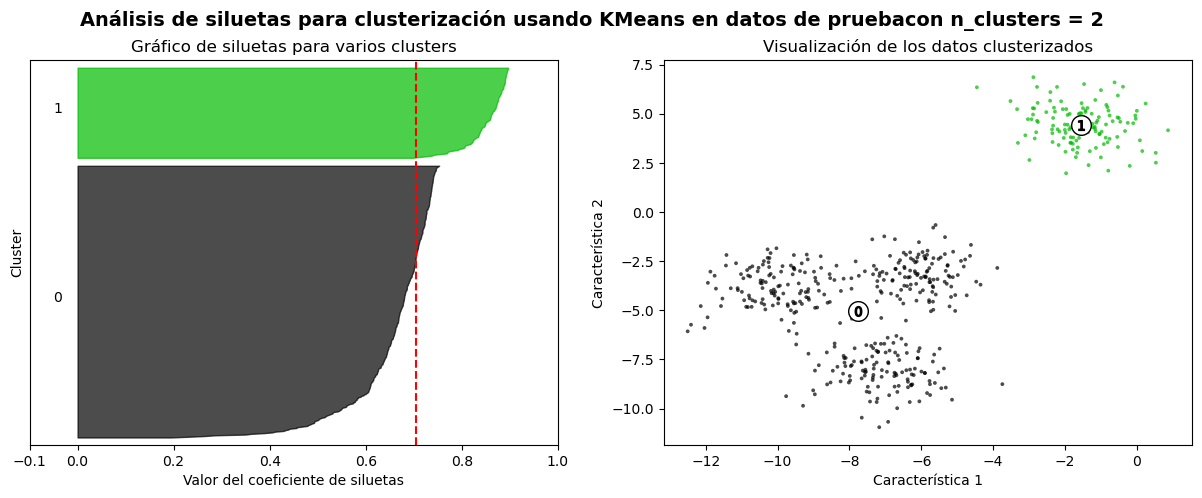

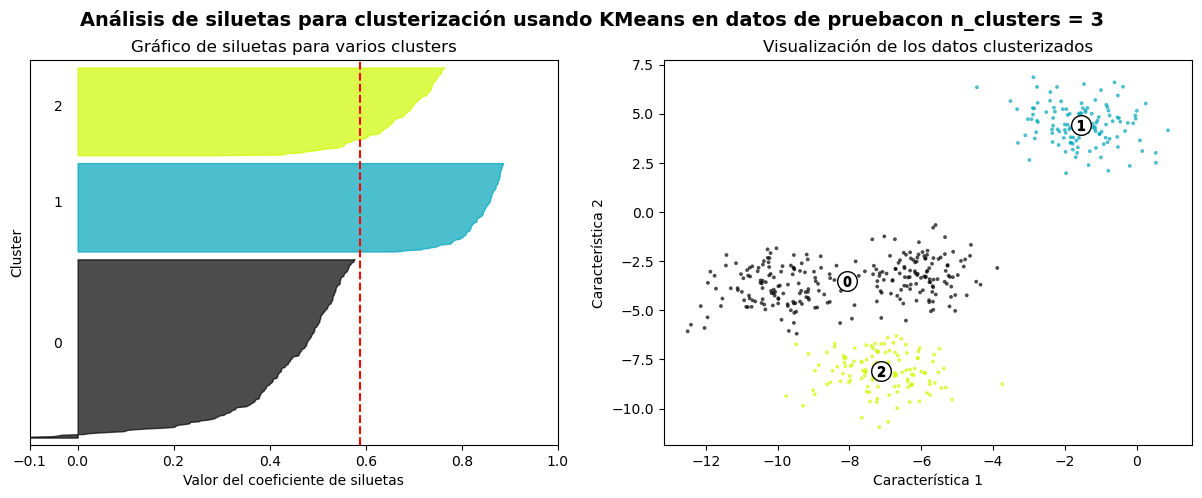

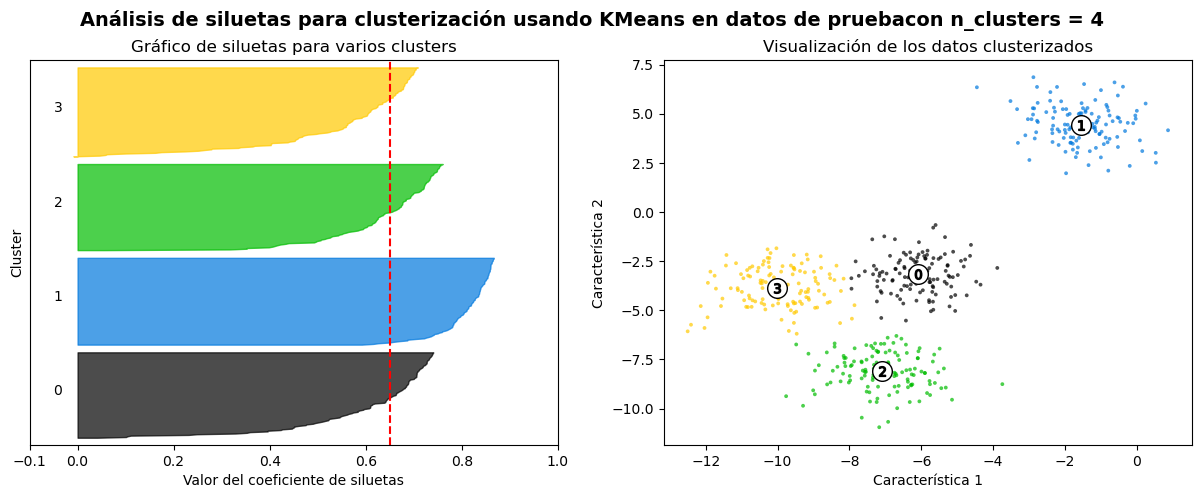

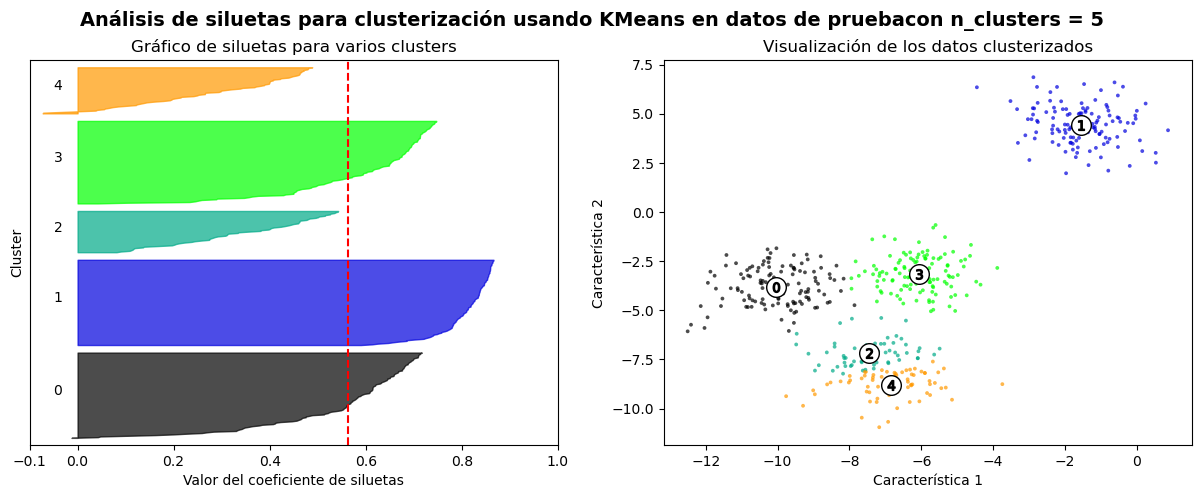

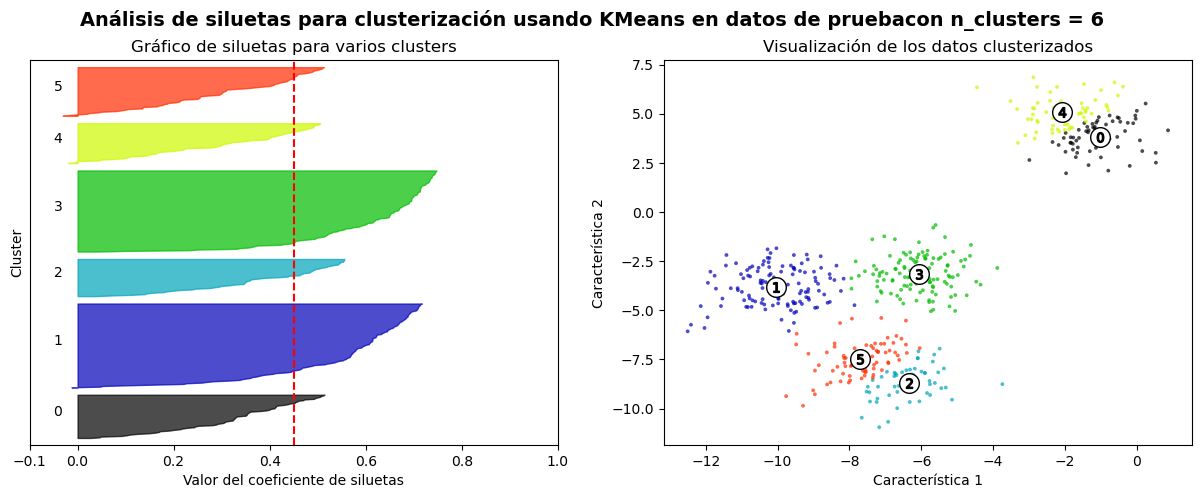

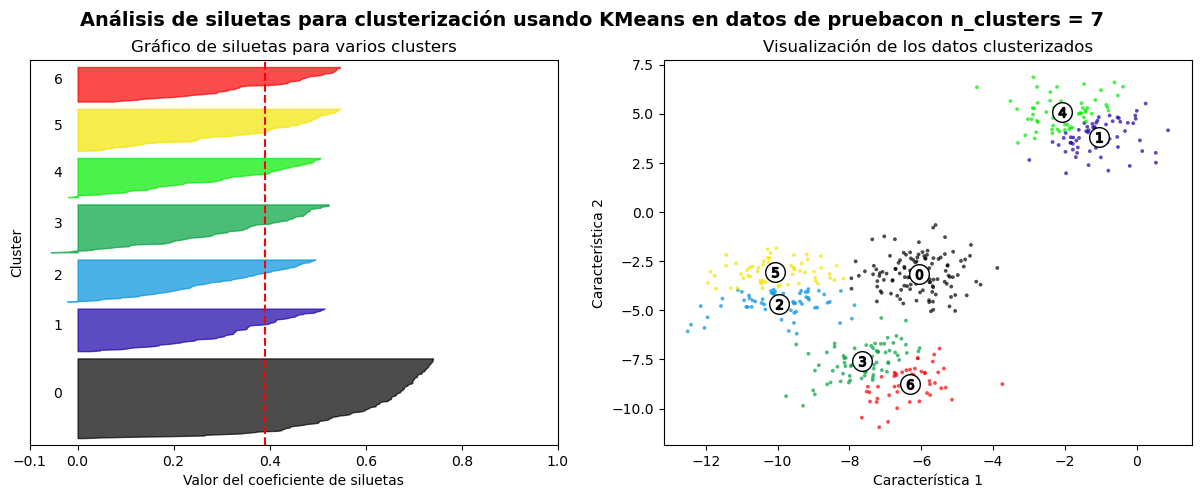

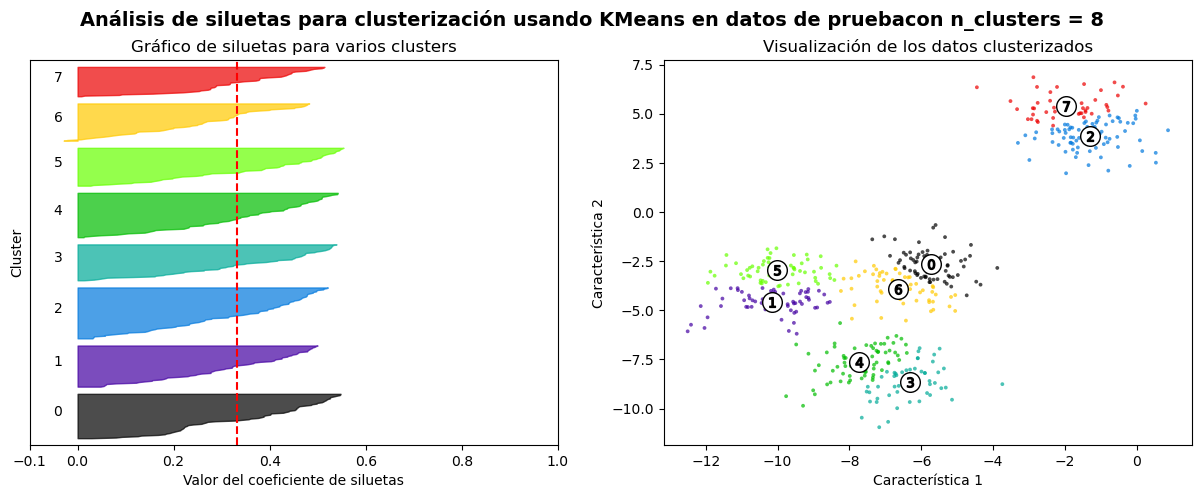

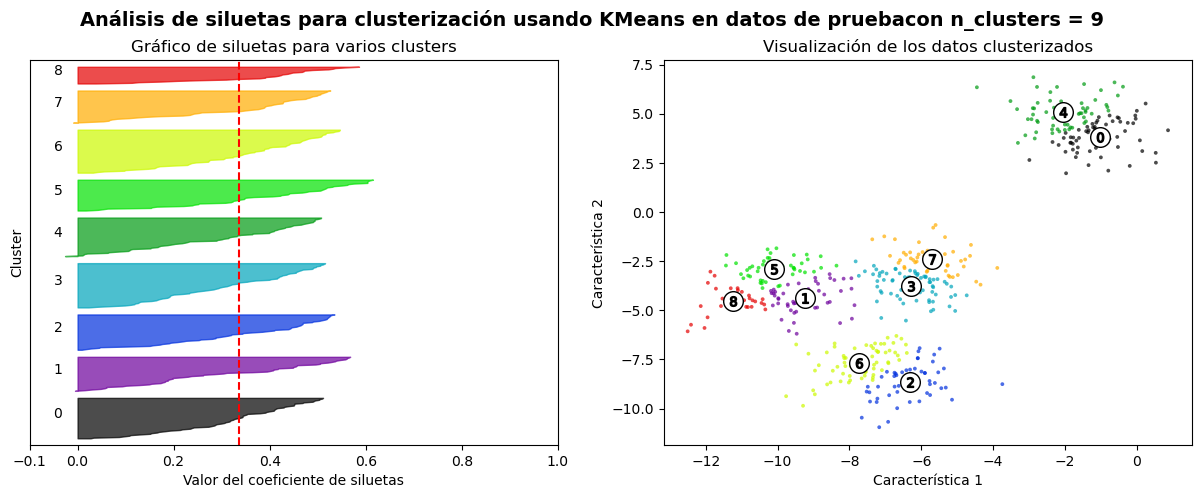

In [21]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from sklearn.datasets import make_blobs

# Generando data de ejemplo usando blobs
# El conjunto de datos tiene 3 clusters juntos y uno alejado
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)

# Se explorará las soluciones para 2 a 6 clusters
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9]

# Funcion para graficar score de silueta y clusterings
for n_clusters in range_n_clusters:

    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(15, 5)

    ax1.set_xlim([-0.1, 1])

    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Se ejecuta el algoritmo KMeans para cada cluster y se genera las etiquetas
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # Se utiliza la función silhouette_score para obtener el score de silueta promedio
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("Para n_clusters =", n_clusters,
          "El score de silueta promedio es :", silhouette_avg)

    # Se utiliza la función silhouette_samples para obtener el score de cada instancia
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    # Se genera el gráfico de comparación.
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10

    ax1.set_title("Gráfico de siluetas para varios clusters")
    ax1.set_xlabel("Valor del coeficiente de siluetas")
    ax1.set_ylabel("Cluster")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    centers = clusterer.cluster_centers_

    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("Visualización de los datos clusterizados")
    ax2.set_xlabel("Característica 1")
    ax2.set_ylabel("Característica 2")

    plt.suptitle(("Análisis de siluetas para clusterización usando KMeans en datos de prueba"
                  "con n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

Se observa que los datos logran una mejor separación cuando k=4. En ese caso todos los clusters tienen el valor de silueta promedio por encima del promedio general y además tienen una caída de la curva consistente.

La métrica Silhouette Score permite realizar una mejor evaluación del modelo.

## Customer Segmentation

In [22]:
data_cus = pd.read_csv('https://raw.githubusercontent.com/Hari365/customer-segmentation-python/master/order_segmentation_0.0.csv')

In [23]:
data_cus.shape

(28101, 17)

In [24]:
data_cus.columns

Index(['Unnamed: 0', 'customer', 'order', 'total_items', 'discount%',
       'weekday', 'hour', 'Food%', 'Fresh%', 'Drinks%', 'Home%', 'Beauty%',
       'Health%', 'Baby%', 'Pets%', 'labels', 'class'],
      dtype='object')

In [25]:
data_cus.head()

,Unnamed: 0,customer,order,total_items,discount%,weekday,hour,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%,labels,class
0,0,0,0,45,23.03,4,13,9.46,87.06,3.48,0.00,0.00,0.00,0.0,0.0,5,loyals_fresh
1,1,0,1,38,1.22,5,13,15.87,75.80,6.22,2.12,0.00,0.00,0.0,0.0,5,loyals_fresh
2,2,0,2,51,18.08,4,13,16.88,56.75,3.37,16.48,6.53,0.00,0.0,0.0,5,loyals_fresh
3,3,1,3,57,16.51,1,12,28.81,35.99,11.78,4.62,2.87,15.92,0.0,0.0,7,health_concious
4,4,1,4,53,18.31,2,11,24.13,60.38,7.78,7.72,0.00,0.00,0.0,0.0,5,loyals_fresh


In [26]:
# Convertimos los items a cada % de categoría
cols = []
for ele in data_cus.columns[7:-2]:  # Desde Food% hasta Pets%
    cols.append(ele[:-1])
cols

['Food', 'Fresh', 'Drinks', 'Home', 'Beauty', 'Health', 'Baby', 'Pets']

In [27]:
data_cus.columns

Index(['Unnamed: 0', 'customer', 'order', 'total_items', 'discount%',
       'weekday', 'hour', 'Food%', 'Fresh%', 'Drinks%', 'Home%', 'Beauty%',
       'Health%', 'Baby%', 'Pets%', 'labels', 'class'],
      dtype='object')

In [28]:
# Colocamos columnas nuevas con las categoría formateadas
for ele in data_cus.columns[7:-2]:  # Desde Food% hasta Pets%
    print(ele[:-1])
    print(ele)
    print("---")
        
    #____________Regla de 3 simple____________
    # total en cantidades - 100 %
    # X en cantidades - 9.46 %
    #____________Obtenemos cantidades____________
    # Obtenemos la cantidades de las categorias, solo tenemos los porcentajes
    # (total en cantidades * categoria en porcentaje) / 100 = categoria en cantidades    
    # ---
    data_cus[ele[:-1]] = (data_cus['total_items'] * data_cus[ele]) / 100  

Food
Food%
---
Fresh
Fresh%
---
Drinks
Drinks%
---
Home
Home%
---
Beauty
Beauty%
---
Health
Health%
---
Baby
Baby%
---
Pets
Pets%
---


In [29]:
data_cus.columns

Index(['Unnamed: 0', 'customer', 'order', 'total_items', 'discount%',
       'weekday', 'hour', 'Food%', 'Fresh%', 'Drinks%', 'Home%', 'Beauty%',
       'Health%', 'Baby%', 'Pets%', 'labels', 'class', 'Food', 'Fresh',
       'Drinks', 'Home', 'Beauty', 'Health', 'Baby', 'Pets'],
      dtype='object')

In [30]:
data_cus.head()

,Unnamed: 0,customer,order,total_items,discount%,weekday,hour,Food%,Fresh%,Drinks%,...,labels,class,Food,Fresh,Drinks,Home,Beauty,Health,Baby,Pets
0,0,0,0,45,23.03,4,13,9.46,87.06,3.48,...,5,loyals_fresh,4.2570,39.1770,1.5660,0.0000,0.0000,0.0000,0.0,0.0
1,1,0,1,38,1.22,5,13,15.87,75.80,6.22,...,5,loyals_fresh,6.0306,28.8040,2.3636,0.8056,0.0000,0.0000,0.0,0.0
2,2,0,2,51,18.08,4,13,16.88,56.75,3.37,...,5,loyals_fresh,8.6088,28.9425,1.7187,8.4048,3.3303,0.0000,0.0,0.0
3,3,1,3,57,16.51,1,12,28.81,35.99,11.78,...,7,health_concious,16.4217,20.5143,6.7146,2.6334,1.6359,9.0744,0.0,0.0
4,4,1,4,53,18.31,2,11,24.13,60.38,7.78,...,5,loyals_fresh,12.7889,32.0014,4.1234,4.0916,0.0000,0.0000,0.0,0.0


In [31]:
data_cus['class'].value_counts()

class
loyals_fresh        6158
loyals_grocery      5559
loyals              5000
drink_buyers        3375
home_decorators     2807
new_parents         2540
beauty_concious     1097
health_concious      692
grocery_shoppers     508
pet_lovers           365
Name: count, dtype: int64

In [32]:
data_cus.columns

Index(['Unnamed: 0', 'customer', 'order', 'total_items', 'discount%',
       'weekday', 'hour', 'Food%', 'Fresh%', 'Drinks%', 'Home%', 'Beauty%',
       'Health%', 'Baby%', 'Pets%', 'labels', 'class', 'Food', 'Fresh',
       'Drinks', 'Home', 'Beauty', 'Health', 'Baby', 'Pets'],
      dtype='object')

In [33]:
data_agg = data_cus.groupby('customer').sum()[['Food','Fresh','Drinks','Home','Beauty','Health','Baby','Pets']]
data_agg

,Food,Fresh,Drinks,Home,Beauty,Health,Baby,Pets
customer,,,,,,,,
0,18.8964,96.9235,5.6483,9.2104,3.3303,0.0000,0.0000,0.0
1,121.0672,317.5807,100.1375,24.0367,17.5430,32.4729,10.1700,0.0
2,6.2660,5.7954,10.0594,3.8792,0.0000,0.0000,0.0000,0.0
3,155.8484,340.4764,59.7142,58.2382,0.0000,0.0000,15.7212,0.0
4,95.1756,288.7877,63.6650,29.0753,4.7403,0.0000,0.5510,0.0
...,...,...,...,...,...,...,...,...
10227,0.0000,0.0000,0.0000,0.0000,45.8591,9.6888,3.4521,0.0
10228,12.7233,25.1713,8.8222,4.4424,3.4253,3.4182,0.0000,0.0
10230,11.0702,3.4317,14.2565,21.6720,1.1163,0.0000,31.4475,0.0


In [34]:
# Obtener los porcentajes totalizados de las sumas totalizadas
# Dividir cada valor en cada fila de data_agg por la suma de los valores en esa misma fila
data_agg = data_agg.div(data_agg.sum(axis=1), axis=0)
data_agg

,Food,Fresh,Drinks,Home,Beauty,Health,Baby,Pets
customer,,,,,,,,
0,0.141009,0.723262,0.042149,0.068730,0.024851,0.000000,0.000000,0.0
1,0.194327,0.509754,0.160732,0.038582,0.028159,0.052123,0.016324,0.0
2,0.241000,0.222900,0.386900,0.149200,0.000000,0.000000,0.000000,0.0
3,0.247379,0.540440,0.094785,0.092442,0.000000,0.000000,0.024954,0.0
4,0.197462,0.599151,0.132086,0.060323,0.009835,0.000000,0.001143,0.0
...,...,...,...,...,...,...,...,...
10227,0.000000,0.000000,0.000000,0.000000,0.777273,0.164217,0.058510,0.0
10228,0.219357,0.433968,0.152100,0.076590,0.059054,0.058932,0.000000,0.0
10230,0.133385,0.041349,0.171777,0.261127,0.013450,0.000000,0.378912,0.0


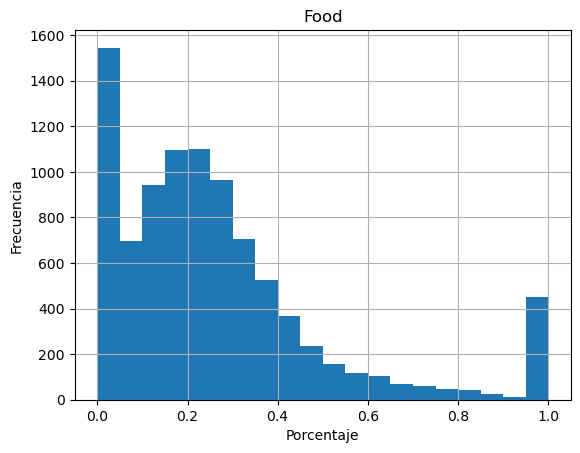

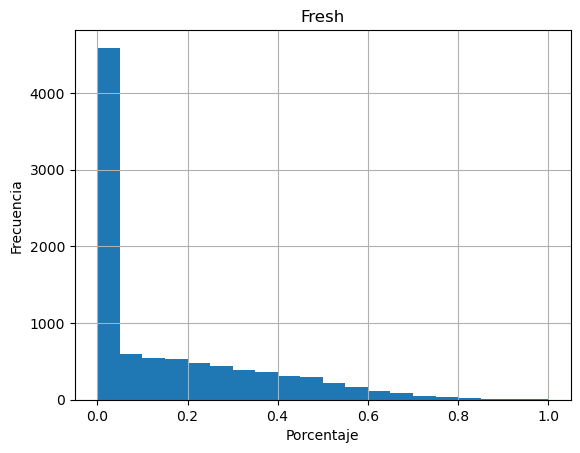

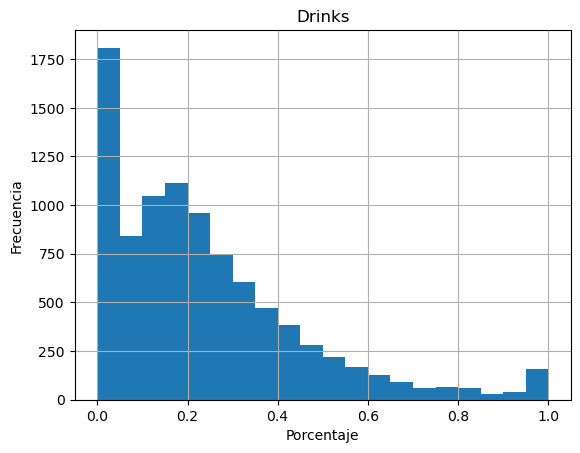

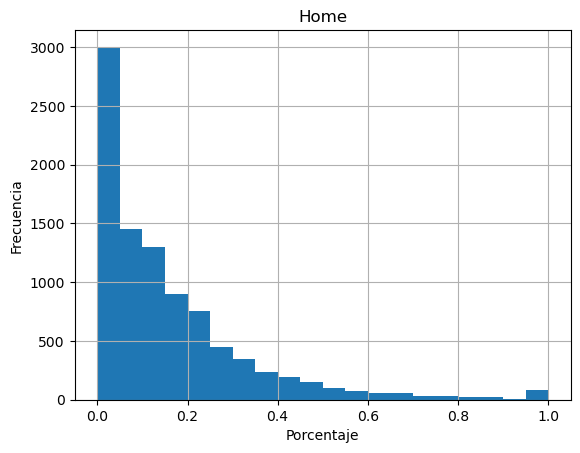

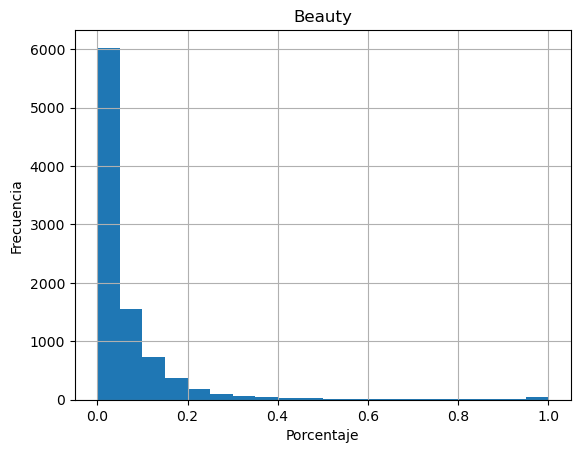

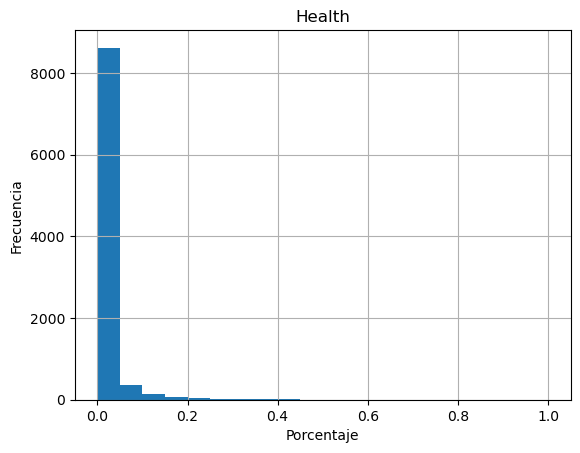

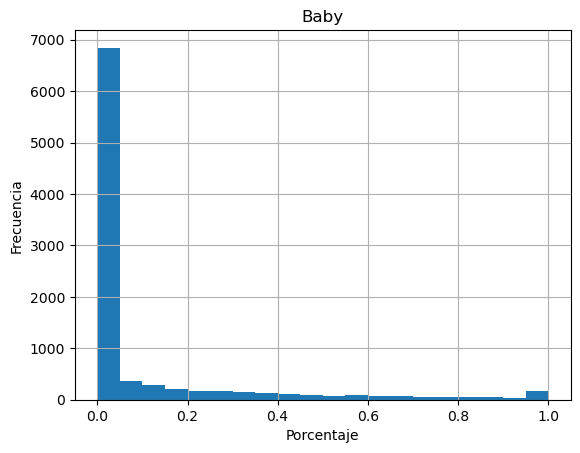

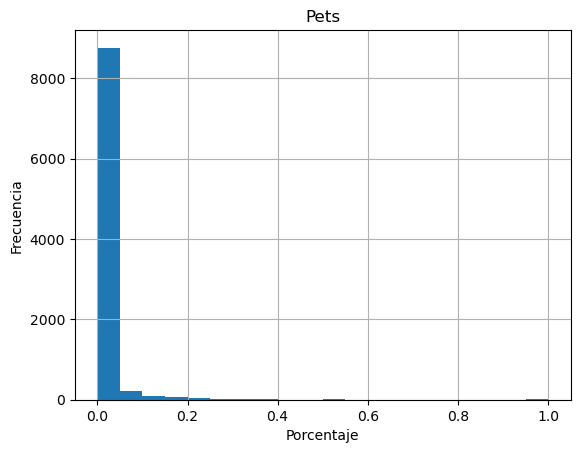

In [35]:
""" 
En un histograma, el eje y generalmente representa la frecuencia o recuento 
de observaciones en cada bin del histograma, no necesariamente la cantidad 
absoluta de observaciones. Por lo tanto, es más preciso referirse a la etiqueta del eje y 
como "Recuento" en lugar de "Cantidades".
"""

for col in data_agg.columns:
    data_agg[col].hist(bins=20)
    plt.title(col)
    plt.xlabel('Porcentaje')
    plt.ylabel('Frecuencia')
    plt.show()

In [19]:
# Aplicamos componentes principales

from sklearn.preprocessing import scale
X = scale(data_agg)

pca = PCA(n_components=3).fit(X)
pca_loadings = pca.components_

pca_features = pca.transform(X)


# Mostramos las cargas de cada componente principal en un DataFrame
pd.DataFrame(pca_loadings, columns=data_agg.columns, index=['PC1', 'PC2', 'PC3']).head()

,Food,Fresh,Drinks,Home,Beauty,Health,Baby,Pets
PC1,-0.624613,-0.402739,0.105054,0.445113,0.247876,0.079491,0.410283,0.049040
PC2,0.135873,0.119796,-0.830134,-0.061946,0.250576,0.209489,0.406854,0.044994
PC3,0.243250,-0.196242,-0.139002,0.473950,0.471348,0.189961,-0.629673,0.060208


In [20]:
pca.explained_variance_

array([1.45281276, 1.2582812 , 1.19755938])

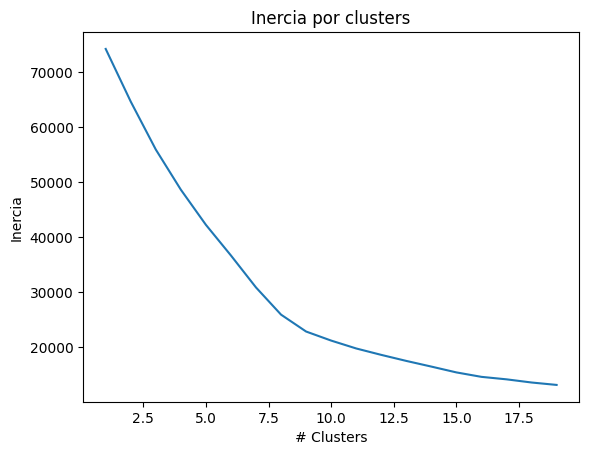

In [21]:
# Calculamos las inercias
inertias = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters = i, max_iter = 300, n_init = 10, random_state = 42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

plt.plot(range(1, 20), inertias)
plt.title('Inercia por clusters')
plt.xlabel('# Clusters')
plt.ylabel('Inercia')
plt.show()

In [22]:
#Visualizamos el score de siluetas
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

Para n_clusters = 2 El score de silueta promedio es : 0.16254135862506958
Para n_clusters = 3 El score de silueta promedio es : 0.21349187690096474
Para n_clusters = 4 El score de silueta promedio es : 0.21600105410784126
Para n_clusters = 5 El score de silueta promedio es : 0.277788718120959
Para n_clusters = 6 El score de silueta promedio es : 0.292859965157157
Para n_clusters = 7 El score de silueta promedio es : 0.31927664091275454
Para n_clusters = 8 El score de silueta promedio es : 0.3311698702486007
Para n_clusters = 9 El score de silueta promedio es : 0.3081581674994903


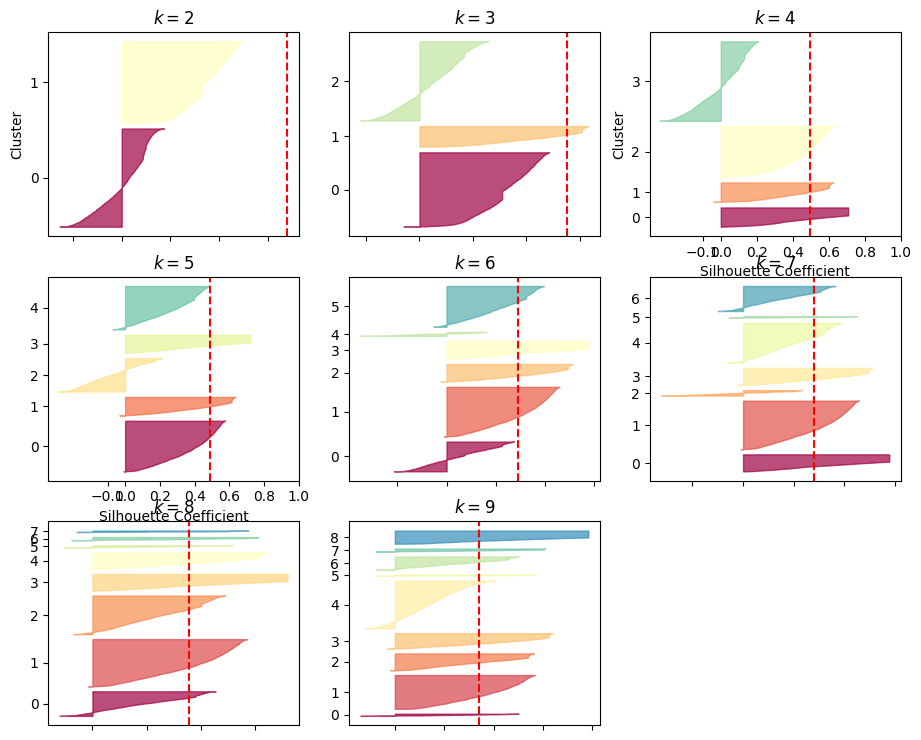

In [23]:
plt.figure(figsize=(11, 9))
for k in (2,3, 4, 5,6,7,8,9):
    plt.subplot(3, 3, k - 1)

    # Se ejecuta el algoritmo KMeans para cada cluster y se genera las etiquetas
    clusterer = KMeans(n_clusters=k, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)


    # Se utiliza la función silhouette_score para obtener el score de silueta promedio
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("Para n_clusters =", k,
          "El score de silueta promedio es :", silhouette_avg)


    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (2, 4):
        plt.ylabel("Cluster")

    if k in (4, 5):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=12)

plt.show()

In [24]:
clusterNum = 8
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 100,random_state=42)

k_means.fit(X)
labels = k_means.labels_

data_agg["Clus_km"] = labels
data_agg["Clus_km"] = data_agg["Clus_km"].astype('str')


g =data_agg.groupby('Clus_km').mean()
g

,Food,Fresh,Drinks,Home,Beauty,Health,Baby,Pets
Clus_km,,,,,,,,
0,0.076503,0.022933,0.104956,0.083007,0.034164,0.006774,0.668302,0.003360
1,0.239396,0.402562,0.167822,0.097272,0.045069,0.009345,0.030649,0.007886
2,0.217595,0.058892,0.510555,0.119101,0.045847,0.006110,0.035972,0.005927
3,0.808616,0.018672,0.083045,0.049548,0.023100,0.004268,0.009225,0.003526
4,0.182275,0.041500,0.170413,0.462317,0.077267,0.009928,0.048964,0.007336
5,0.111376,0.035436,0.146905,0.132387,0.041148,0.002248,0.021116,0.509383
6,0.178086,0.065569,0.161314,0.099984,0.099602,0.327307,0.052145,0.015993
7,0.095253,0.020064,0.067139,0.115610,0.653331,0.013656,0.028990,0.005958


In [25]:
# Quienes son los usuarios del cluster 0?
users_k = data_agg[data_agg['Clus_km']=='7'].index
data_cus[data_cus['customer'].isin(users_k)]['class'].value_counts()

class
beauty_concious    239
home_decorators      2
new_parents          2
health_concious      2
loyals_grocery       2
pet_lovers           2
loyals               1
Name: count, dtype: int64

In [26]:
data_agg['PC1'] = pca_features[:,0]
data_agg['PC2'] = pca_features[:,1]
data_agg['PC3'] = pca_features[:,2]

import plotly.express as px
fig = px.scatter_3d(data_agg.reset_index(), x='PC1', y='PC2', z='PC3',
                    color='Clus_km',
                    #text='College',
                    #hover_data = ['College','Enroll'],
                    #size='Absenteeism time in hours',
                    #size_max=50,
                    #color_discrete_sequence=['blue','red','cyan','black'],
                    height=600,
                    width=900)
fig.show()

In [27]:
fig = px.scatter(data_agg, x='PC1', y='PC2',
                    color='Clus_km',
                    height=600,
                    width=900)
fig.show()

## Clustering con Datos de Países

El estudio de los factores socioeconómicos es fundamental para comprender y moldear el futuro de las sociedades, y por lo tanto, de gran interés para varias instituciones gubernamentales y no gubernamentales. Si bien el PIB es una de las medidas más populares utilizadas en el lenguaje común, no es la única medida del crecimiento y estado de una economía. Este estudio de caso tiene como objetivo sumergirse en un conjunto de datos que contiene diversos atributos socioeconómicos de países de todo el mundo.

**Objetivo**
Para identificar si existen varios grupos de países que son más similares entre sí en términos de ciertos factores socioeconómicos.

Los datos contienen los siguientes atributos:

- país: Nombre del país
- child_mort: Muerte de niños menores de 5 años por cada 1000 nacidos vivos
- exports: Exportaciones en % del PIB per cápita
- health: Gasto total en salud como % del PIB
- imports: Valor de las importaciones como % del PIB per cápita
- income: Ingreso neto por persona
- inflation: Tasa de inflación %
- life_expec: Expectativa de vida promedio en años
- total_fer: Tasa de fertilidad: promedio de niños por mujer en el país
- gdpp: PIB per cápita

In [28]:
data = pd.read_csv("https://raw.githubusercontent.com/CristhianCastro25/Programacion_Analisis_Exploratorio/main/Country-data.csv")
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


Las observaciones son las siguientes:

- Hay 167 observaciones y 10 columnas en los datos.
- Todas las columnas tienen 167 valores que no son nulos, es decir, no hay valores faltantes.
- Todas las columnas excepto el nombre del país son numéricas.
- Todo parece estar en orden, sigamos adelante para verificar duplicados.

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,38.270060,40.328931,2.6000,8.250,19.30,62.10,208.00
exports,167.0,41.108976,27.412010,0.1090,23.800,35.00,51.35,200.00
health,167.0,6.815689,2.746837,1.8100,4.920,6.32,8.60,17.90
imports,167.0,46.890215,24.209589,0.0659,30.200,43.30,58.75,174.00
income,167.0,17144.688623,19278.067698,609.0000,3355.000,9960.00,22800.00,125000.00
inflation,167.0,7.781832,10.570704,-4.2100,1.810,5.39,10.75,104.00
life_expec,167.0,70.555689,8.893172,32.1000,65.300,73.10,76.80,82.80
total_fer,167.0,2.947964,1.513848,1.1500,1.795,2.41,3.88,7.49
gdpp,167.0,12964.155689,18328.704809,231.0000,1330.000,4660.00,14050.00,105000.00


Observaciones:

- La tasa de mortalidad infantil tiene un amplio rango, desde 2.6 hasta 208 muertes por cada 1000 nacidos vivos. La tasa promedio de mortalidad infantil es aproximadamente de 38 muertes por cada 1000 nacidos vivos.
- De manera similar, las exportaciones e importaciones tienen un amplio rango de valores. Los valores máximos para exportaciones e importaciones son 200% y 174% del PIB respectivamente. Esto puede ocurrir si la industria de exportación o importación de un país supera su economía doméstica.
- El gasto total en salud es muy bajo en comparación con las exportaciones e importaciones para la mayoría de los países. El gasto promedio en salud es aproximadamente del 6.8% del PIB.
- La expectativa de vida promedio es de aproximadamente 70 años, pero el valor mínimo es de solo 32 años.
- Otras variables como el PIB per cápita, la inflación y el ingreso también muestran una alta variabilidad, lo cual es esperable ya que pueden ser muy diferentes en distintos países.
- En general, el porcentaje de gasto en salud y la expectativa de vida promedio parecen tener una desviación estándar menor, lo que refleja una menor variabilidad entre países. Todas las demás variables parecen tener una alta dispersión entre los países. Estas variables podrían ayudarnos a identificar los clusters, si existen.

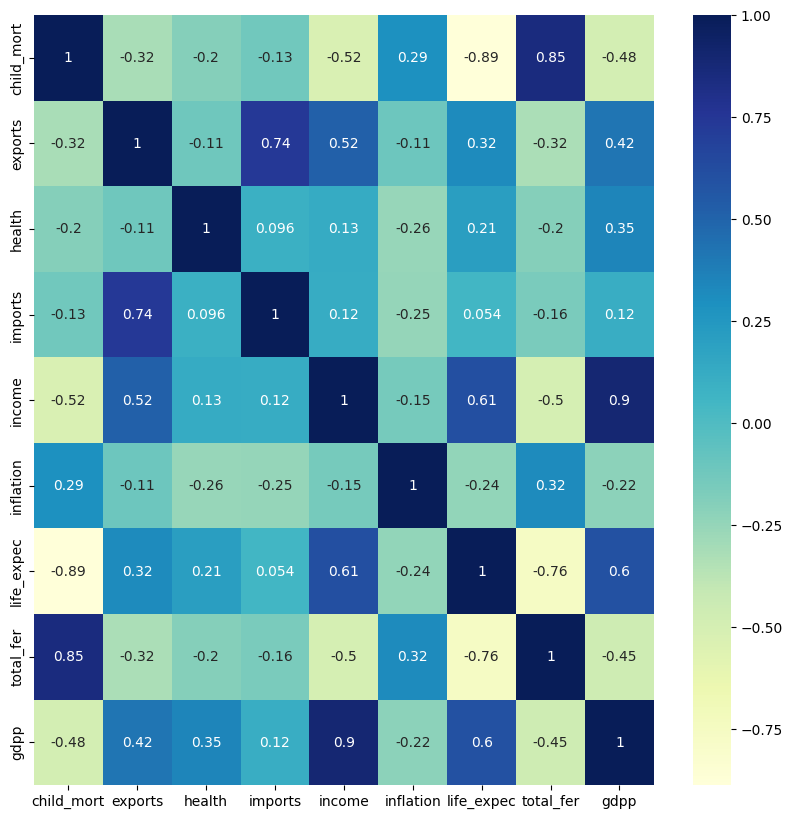

In [ ]:
plt.figure(figsize  = (10,10))
sns.heatmap(data.corr(), annot = True, cmap="YlGnBu")
plt.show()

Observaciones:

- Existe una fuerte correlación positiva entre el PIB per cápita (gdpp) y el ingreso. Esto tiene sentido.
- La expectativa de vida está positivamente correlacionada con el PIB per cápita. Esto indica que las personas viven más tiempo en países más ricos.
- Hay una fuerte correlación negativa entre la expectativa de vida y la mortalidad infantil. Esto es comprensible.
- La mortalidad infantil tiene una fuerte correlación positiva con la tasa de fertilidad. Esto indica que un aumento en la población lleva a una mayor mortalidad infantil.

### Scaling

Es una buena práctica escalar los datos antes de aplicar algoritmos de clustering, ya que estos algoritmos se basan en distancias y pueden ser afectados por la escala de las variables. En este caso, se sugiere eliminar las variables 'country' y 'gdpp' antes de escalar los datos, ya que no se utilizarán para agrupar los países.

In [30]:
data_new = data.drop(columns=["country", "gdpp"])

In [31]:

scaler=StandardScaler()
data_scaled=pd.DataFrame(scaler.fit_transform(data_new), columns=data_new.columns)

data_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946


In [32]:
data_scaled_copy = data_scaled.copy(deep=True)

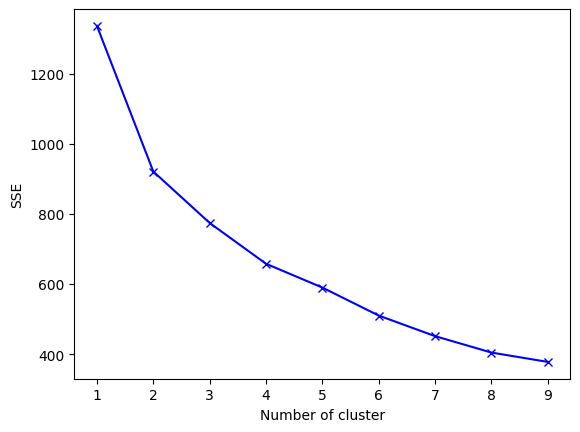

In [33]:
sse = {}

# iterate for a range of Ks and fit the scaled data to the algorithm. Use inertia attribute from the clustering object and
# store the inertia value for that k
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(data_scaled)
    sse[k] = kmeans.inertia_

#Elbow plot
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()), 'bx-')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

Parece que no hay un punto claro de inflexión o "codo" en el gráfico entre 2 y 8 clusters. Podríamos considerar cualquier número de clusters en este rango. Para obtener una segunda opinión basada en métricas, podríamos usar los puntajes de silueta para evaluar cómo varían con diferentes valores de k. ¿Te gustaría explorar esta métrica para tomar una decisión más informada sobre la cantidad de clusters a elegir?

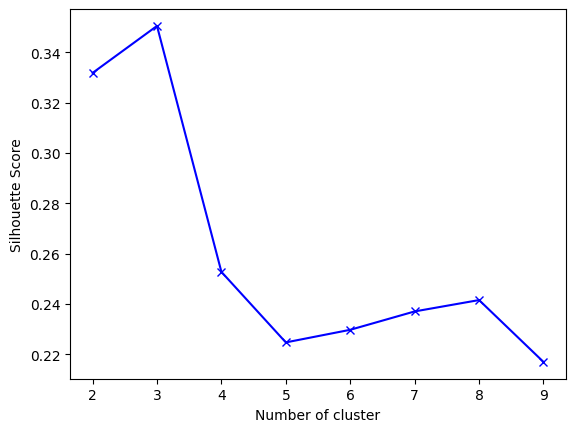

In [34]:
#Empty dictionary to store the Silhouette score for each value of k
sc = {}

# iterate for a range of Ks and fit the scaled data to the algorithm. Store the Silhouette score for that k
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(data_scaled)
    labels = kmeans.predict(data_scaled)
    sc[k] = silhouette_score(data_scaled, labels)

#Elbow plot
plt.figure()
plt.plot(list(sc.keys()), list(sc.values()), 'bx-')
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Score")
plt.show()

Parece que el puntaje de silueta es más alto para k=3, lo que nos da un punto de partida para explorar estos tres clusters. Empezar con tres clusters puede proporcionar una buena base para comprender las dinámicas y diferencias entre estos grupos.

In [35]:
kmeans = KMeans(n_clusters=3, random_state=1)
kmeans.fit(data_scaled)

#Adding predicted labels to the original data and scaled data
data_scaled_copy['KMeans_Labels'] = kmeans.predict(data_scaled)
data['KMeans_Labels'] = kmeans.predict(data_scaled)
data['KMeans_Labels'] = data['KMeans_Labels'].astype('str')

In [36]:
data['KMeans_Labels'].value_counts()

KMeans_Labels
0    112
1     52
2      3
Name: count, dtype: int64

Entiendo, parece que la distribución de las observaciones en los clusters no es equilibrada. Sería útil examinar los perfiles de estos clusters para comprender por qué hay una disparidad tan grande en la cantidad de observaciones en cada uno. ¿Te gustaría explorar más a fondo los perfiles de cada cluster para entender mejor esta discrepancia?

In [38]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans_Labels
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0


In [37]:
#Calculating mean and median of the original data for each label
mean = data.groupby('KMeans_Labels').mean()
median = data.groupby('KMeans_Labels').median()
df_kmeans = pd.concat([mean, median], axis=0)
df_kmeans.index = ['group_0 Mean', 'group_1 Mean', 'group_2 Mean', 'group_0 Median', 'group_1 Median', 'group_2 Median']
df_kmeans.T

TypeError: Could not convert AlbaniaAlgeriaAntigua and BarbudaArgentinaArmeniaAustraliaAustriaAzerbaijanBahamasBahrainBangladeshBarbadosBelarusBelgiumBelizeBhutanBoliviaBosnia and HerzegovinaBrazilBruneiBulgariaCambodiaCanadaCape VerdeChileChinaColombiaCosta RicaCroatiaCyprusCzech RepublicDenmarkDominican RepublicEcuadorEgyptEl SalvadorEstoniaFijiFinlandFranceGeorgiaGermanyGreeceGrenadaGuatemalaGuyanaHungaryIcelandIndonesiaIranIrelandIsraelItalyJamaicaJapanJordanKazakhstanKuwaitKyrgyz RepublicLatviaLebanonLibyaLithuaniaMacedonia, FYRMalaysiaMaldivesMauritiusMicronesia, Fed. Sts.MoldovaMongoliaMontenegroMoroccoNetherlandsNew ZealandNorwayOmanPanamaParaguayPeruPhilippinesPolandPortugalQatarRomaniaRussiaSamoaSaudi ArabiaSerbiaSeychellesSlovak RepublicSloveniaSouth KoreaSpainSri LankaSt. Vincent and the GrenadinesSurinameSwedenSwitzerlandThailandTongaTunisiaTurkeyTurkmenistanUkraineUnited Arab EmiratesUnited KingdomUnited StatesUruguayUzbekistanVanuatuVenezuelaVietnam to numeric

Observaciones:

Parece que el Cluster 2 está conformado por países muy ricos con altos ingresos y PIB per cápita, el Cluster 1 está compuesto por países muy pobres con bajos ingresos y PIB, y el resto se encuentra en el Cluster 0, que también resulta ser el cluster más grande. Esto tiene sentido intuitivamente, pero intentemos visualizar los boxplots de diferentes atributos para cada cluster para ver si podemos identificar patrones más detallados.

Podemos tener una idea de los clusters si ploteamos los países en un scatterplot de 3 dimensiones, mostrando en los ejes los 3 Componentes principales

In [39]:
X = scale(data_agg)

pca = PCA(n_components=3).fit(data_scaled)
pca_loadings = pca.components_

pca_features = pca.transform(data_scaled)

In [40]:
data['PC1'] = pca_features[:,0]
data['PC2'] = pca_features[:,1]
data['PC3'] = pca_features[:,2]

In [41]:
fig = px.scatter_3d(data, x='PC1', y='PC2', z='PC3',
                    color='KMeans_Labels',
                    text='country',
                    hover_data = ['exports','imports','income'],
                    #size='Absenteeism time in hours',
                    #size_max=50,
                    color_discrete_sequence=['blue','orange','green','black'],
                    height=600,
                    width=900)
fig.show()

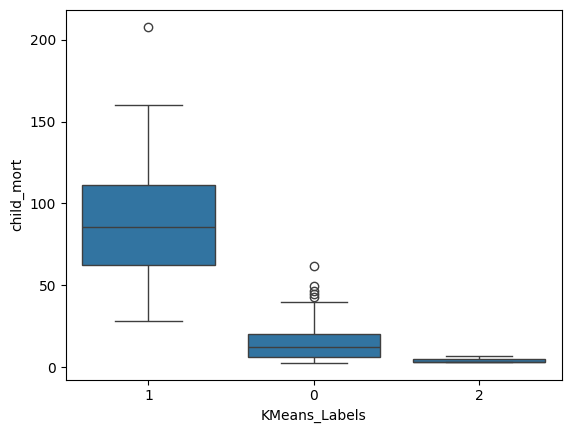

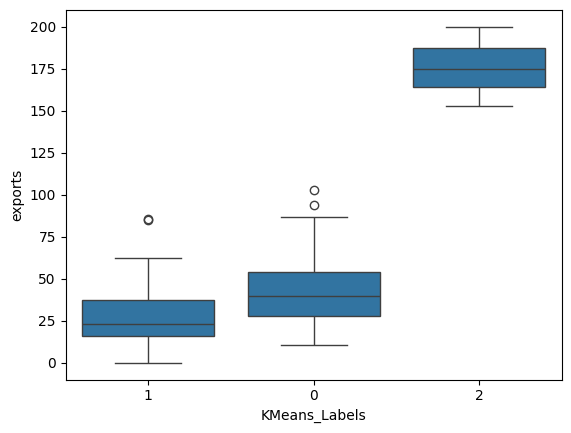

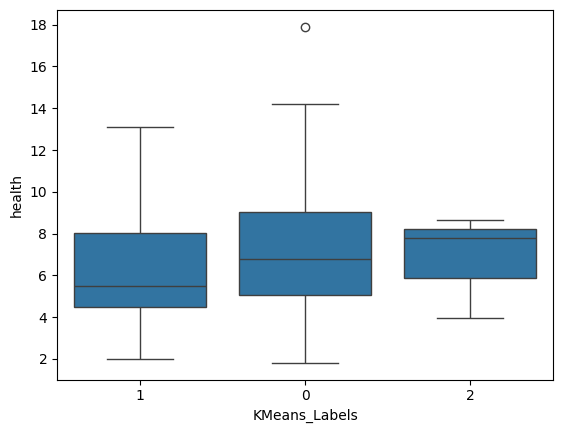

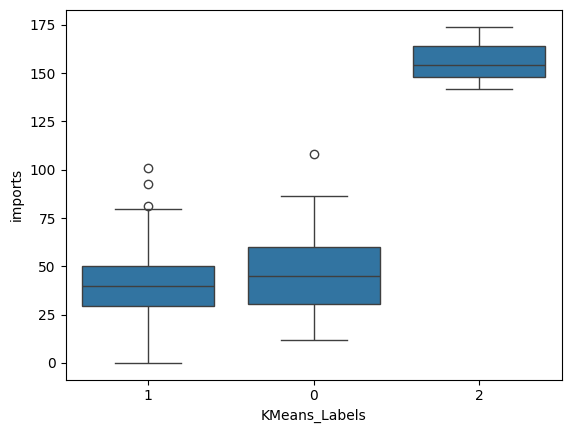

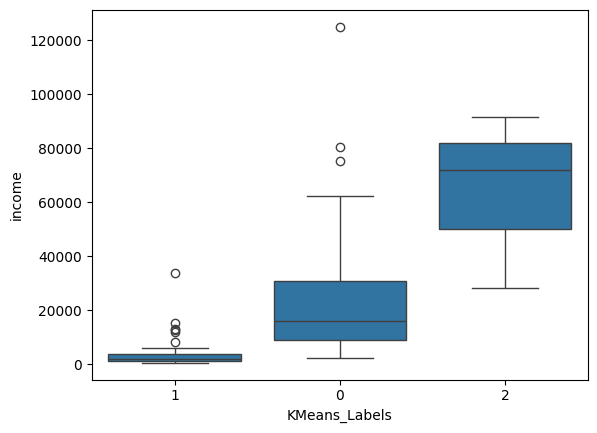

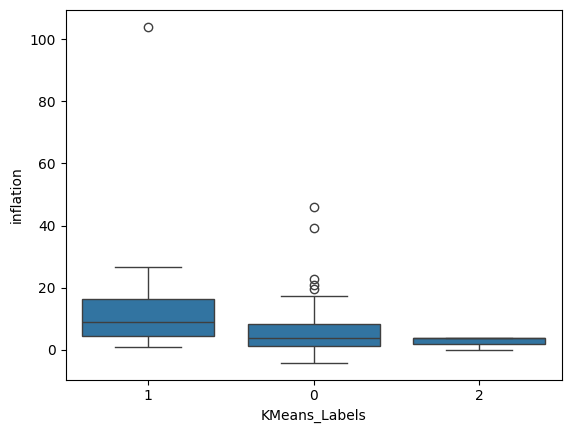

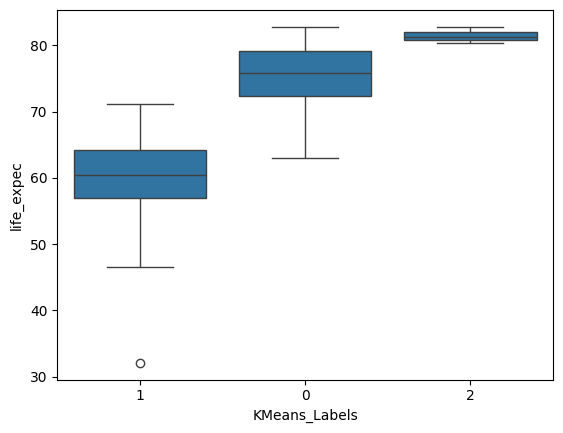

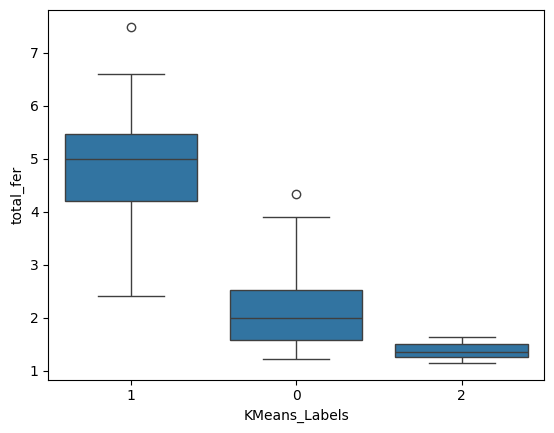

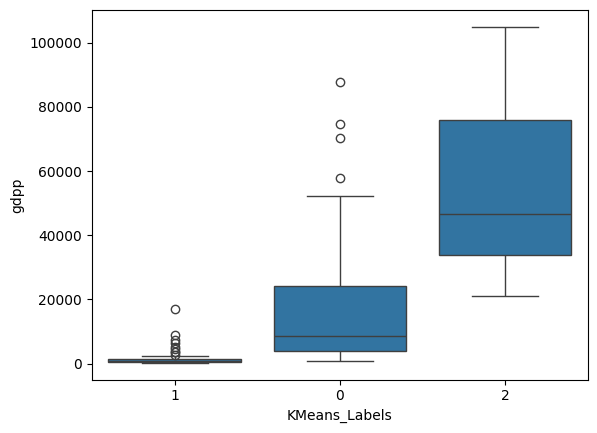

In [42]:
cols_visualise = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']

for col in cols_visualise:
    sns.boxplot(x = 'KMeans_Labels', y = col, data = data)
    plt.show()

Perfiles de los Clusters:

- El Cluster 2 tiene solo 3 observaciones. Como se observó en gráficos de dispersión y boxplots, el grupo 2 consiste en países atípicos con las más altas importaciones y exportaciones como porcentaje del PIB. Estos países también tienen ingresos muy altos.
- El Cluster 1 parece tener valores muy bajos en muchos indicadores, como la tasa de inflación más alta, el PIB per cápita más bajo, las exportaciones más bajas, así como las importaciones; todos estos señalan una situación económica muy pobre. Además, tienen la mayor mortalidad infantil, la fertilidad más alta y la esperanza de vida más baja; todo esto indica un estado deficiente en la atención médica del país. Este cluster muestra características de países subdesarrollados y en desarrollo. También parece que estos países tienen un déficit comercial, es decir, las importaciones superan a las exportaciones. Cuando un país tiene un déficit comercial, debe pedir prestado a otros países para pagar las importaciones adicionales.
- El Cluster 0 es el cluster más grande y muestra características tanto de países en desarrollo como desarrollados. Los países en este cluster tienen un estado de asuntos socioeconómicos comparativamente mejor, pero con un rango amplio de valores, lo que indica que es una mezcla de muchos tipos diferentes de países. Idealmente, no queremos que un cluster sea así, ya que la idea fundamental detrás del agrupamiento es 'agrupar cosas similares', y este cluster parece tener mucha 'diferencia' dentro de él.

En general, esta solución de clustering nos brinda información valiosa sobre posibles clusters de países similares, pero no es muy útil ya que está influenciada por países atípicos, lo que resulta en un cluster muy pequeño y dos clusters muy grandes. Deberíamos probar otros algoritmos para ver si podemos obtener mejores resultados.

### K Medoides

In [43]:
pip install scikit-learn-extra

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 22.8 MB/s eta 0:00:00


In [44]:
from sklearn_extra.cluster import KMedoids

In [45]:
kmedo = KMedoids(n_clusters = 3, random_state=1)
kmedo.fit(data_scaled)

data_scaled_copy['kmedoLabels'] = kmedo.predict(data_scaled)
data['kmedoLabels'] = kmedo.predict(data_scaled)
data['kmedoLabels'] = data['kmedoLabels'].astype('str')

In [46]:
data.kmedoLabels.value_counts()

kmedoLabels
1    75
2    58
0    34
Name: count, dtype: int64

In [48]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans_Labels,PC1,PC2,PC3,kmedoLabels
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1,-2.905884,0.158314,-0.909068,2
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0,0.724072,-0.656184,-0.112554,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0,-0.096809,-0.477845,1.360551,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1,-3.003799,1.787892,1.311144,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0,1.180444,0.083856,-0.069501,1


In [49]:
original_features = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']

mean = data.groupby('kmedoLabels').agg({'child_mort':'mean','exports':'mean','health':'mean','imports':'mean','income':'mean','inflation':'mean','life_expec':'mean','total_fer':'mean','gdpp':'mean'})
median = data.groupby('kmedoLabels').agg({'child_mort':'median','exports':'median','health':'median','imports':'median','income':'median','inflation':'median','life_expec':'median','total_fer':'median','gdpp':'median'})
df_kmedoids = pd.concat([mean, median], axis=0)
df_kmedoids.index = ['group_0 Mean', 'group_1 Mean', 'group_2 Mean', 'group_0 Median', 'group_1 Median', 'group_2 Median']
df_kmedoids[original_features].T

,group_0 Mean,group_1 Mean,group_2 Mean,group_0 Median,group_1 Median,group_2 Median
child_mort,7.085294,17.853333,82.951724,4.700,15.70,79.600
exports,36.938235,52.989333,28.191362,31.600,48.30,23.800
health,9.413235,6.202133,6.086379,9.585,6.00,5.275
imports,33.452941,57.694667,40.795964,30.750,55.10,36.800
income,38094.705882,17592.800000,4284.189655,36550.000,13500.00,2145.000
inflation,4.020676,5.511573,12.922328,1.825,3.82,9.225
life_expec,79.614706,73.870667,60.958621,80.200,74.10,60.800
total_fer,1.842353,2.179600,4.589655,1.875,2.13,4.875
gdpp,35925.588235,10989.813333,2057.034483,38700.000,6230.00,994.000


In [50]:
fig = px.scatter_3d(data, x='PC1', y='PC2', z='PC3',
                    color='kmedoLabels',
                    text='country',
                    hover_data = ['exports','imports','income'],
                    #size='Absenteeism time in hours',
                    #size_max=50,
                    color_discrete_sequence=['blue','orange','green','black'],
                    height=600,
                    width=900)
fig.show()

Observaciones:

Parece que el Cluster 0 está compuesto por países muy ricos con altos ingresos y PIB per cápita, el Cluster 2 está formado por países muy pobres con bajos ingresos y PIB, y el resto se encuentra en el Cluster 1, que también resulta ser el cluster más grande. Esto tiene sentido intuitivamente, pero intentemos visualizar los boxplots de diferentes atributos para cada cluster para ver si podemos identificar patrones más detallados.

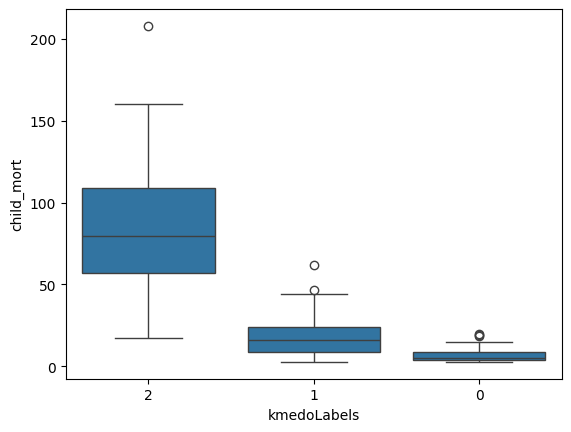

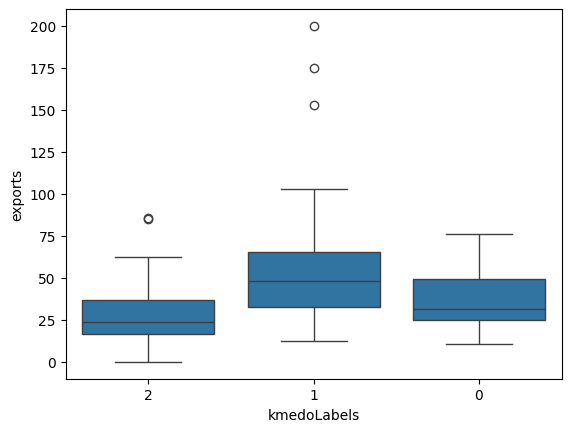

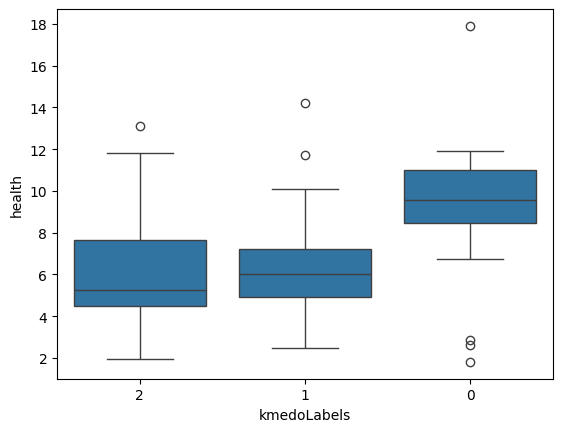

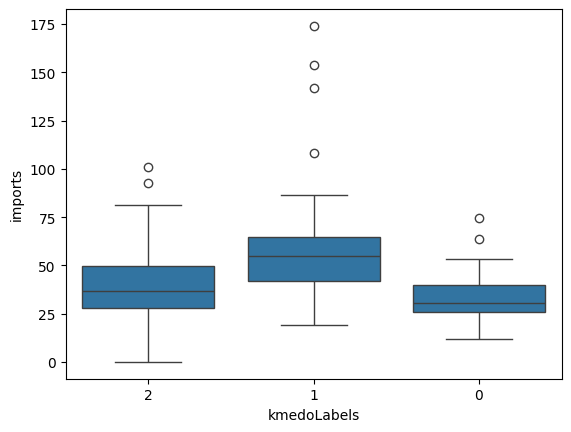

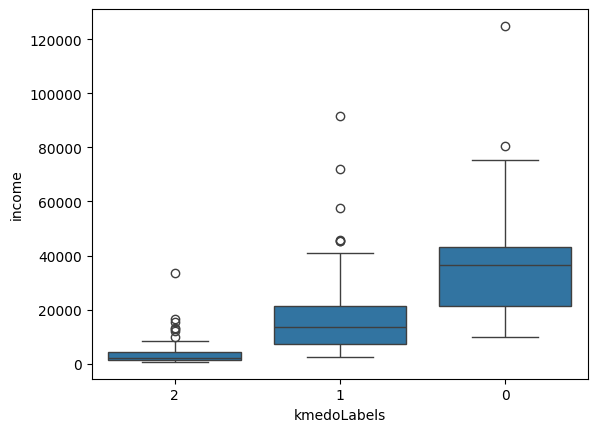

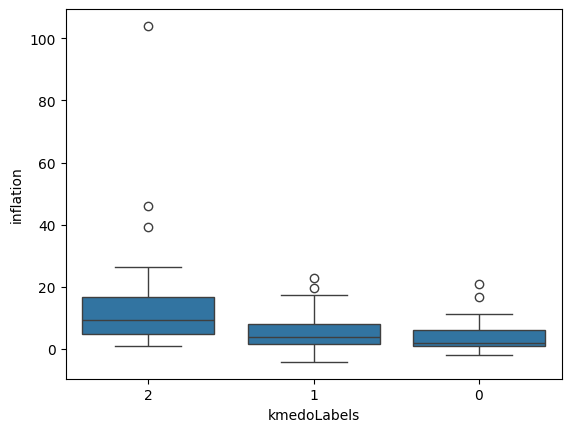

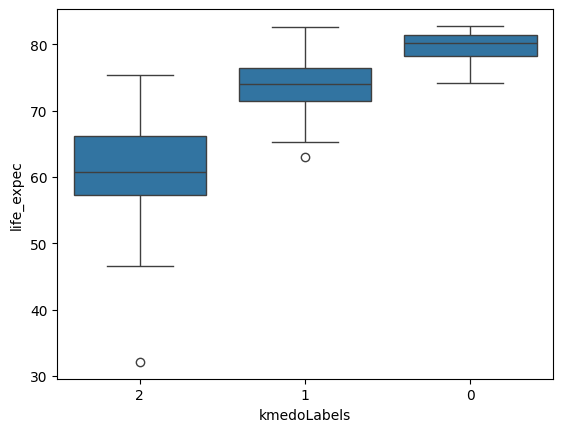

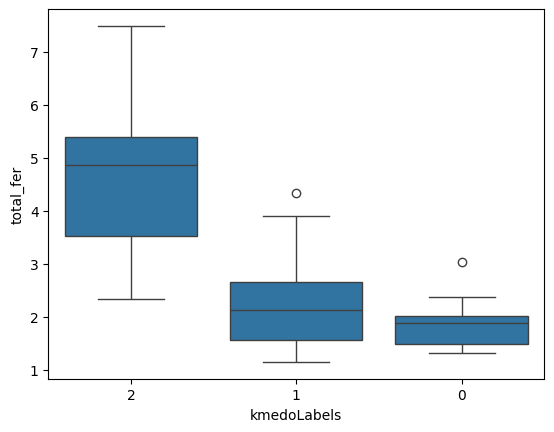

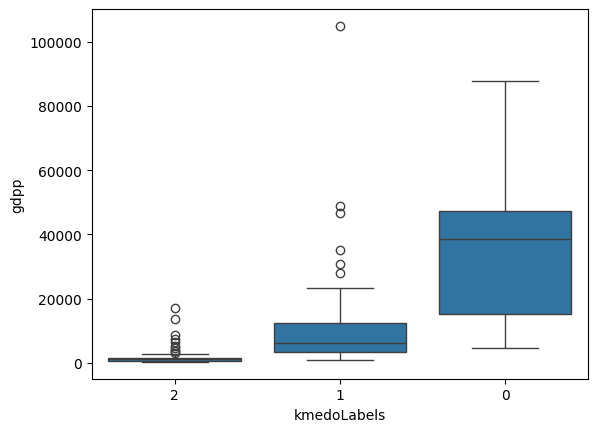

In [51]:
for col in cols_visualise:
    sns.boxplot(x = 'kmedoLabels', y = col, data = data)
    plt.show()

Observaciones:

La cantidad de observaciones en cada cluster obtenido mediante K-Medoids está distribuida de manera más uniforme en comparación con los clusters de K-Means.
Esto se debe a que los clusters de K-Medoids se ven menos afectados por valores atípicos en los datos. Observamos que tres países atípicos (en términos de importaciones y exportaciones) están incluidos en el cluster 1 y no forman un cluster separado como en K-Means.
A diferencia de K-Means, el cluster de países desarrollados es mucho más grande pero aún conserva las características generales de los países desarrollados, reflejadas en valores más altos para ingreso per cápita, expectativa de vida, etc., especialmente en el gasto en salud como porcentaje del PIB.

### Gaussian Mixture Clustering

In [52]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components = 3, random_state = 1)
gmm.fit(data_scaled)

data_scaled_copy['GmmLabels'] = gmm.predict(data_scaled)
data['GmmLabels'] = gmm.predict(data_scaled)
data['GmmLabels'] = data['GmmLabels'].astype('str')

In [53]:
data.GmmLabels.value_counts()

GmmLabels
0    67
2    62
1    38
Name: count, dtype: int64

In [54]:
#Calculating mean and median of the original data for each label
original_features = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']


mean = data.groupby('GmmLabels').agg({'child_mort':'mean','exports':'mean','health':'mean','imports':'mean','income':'mean','inflation':'mean','life_expec':'mean','total_fer':'mean','gdpp':'mean'})
median = data.groupby('GmmLabels').agg({'child_mort':'median','exports':'median','health':'median','imports':'median','income':'median','inflation':'median','life_expec':'median','total_fer':'median','gdpp':'median'})

df_gmm = pd.concat([mean, median], axis=0)
df_gmm.index = ['group_0 Mean', 'group_1 Mean', 'group_2 Mean', 'group_0 Median', 'group_1 Median', 'group_2 Median']
df_gmm[original_features].T

,group_0 Mean,group_1 Mean,group_2 Mean,group_0 Median,group_1 Median,group_2 Median
child_mort,76.459701,5.544737,17.058065,66.80,4.250,16.550
exports,30.704463,60.047368,40.745161,25.00,50.900,35.400
health,6.140000,8.444737,6.547419,5.30,9.405,6.440
imports,43.886058,51.736842,47.166129,42.90,40.950,48.250
income,4578.850746,45431.578947,13386.774194,2520.00,40900.000,12800.000
inflation,11.796642,3.538553,6.043968,8.43,1.395,4.465
life_expec,62.070149,79.707895,74.116129,61.80,80.200,74.150
total_fer,4.404776,1.791579,2.082419,4.60,1.850,2.040
gdpp,2235.880597,40707.105263,7553.870968,1170.00,39750.000,6240.000


Observaciones:

Parece que el Cluster 1 está compuesto por países muy ricos con altos ingresos y PIB per cápita, mientras que el Cluster 0 está formado por países muy pobres con bajos ingresos y PIB. El resto de países se encuentra en el cluster 2. Esto tiene sentido intuitivamente, pero intentemos visualizar los boxplots de diferentes atributos para cada cluster para ver si podemos identificar patrones más detallados.

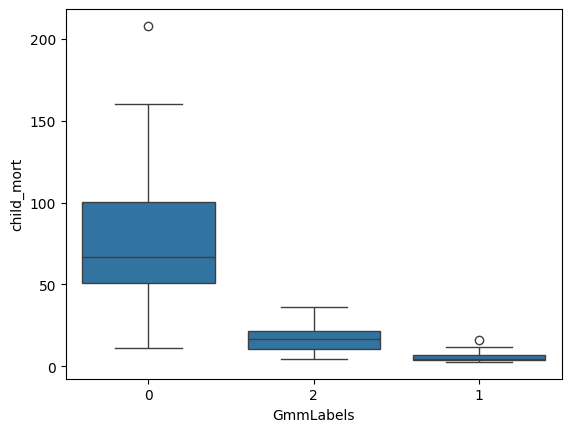

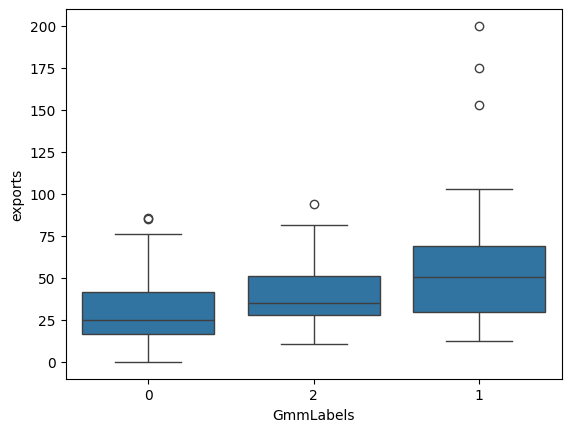

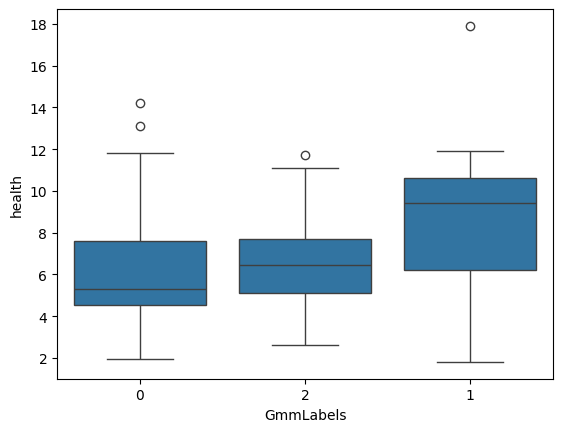

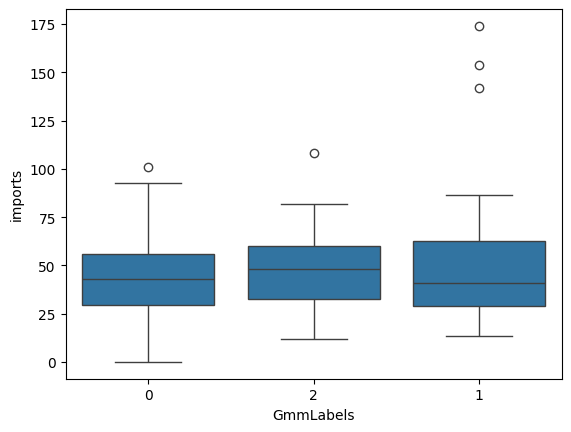

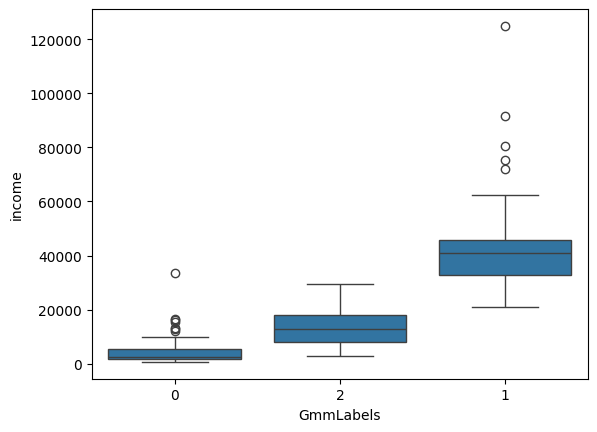

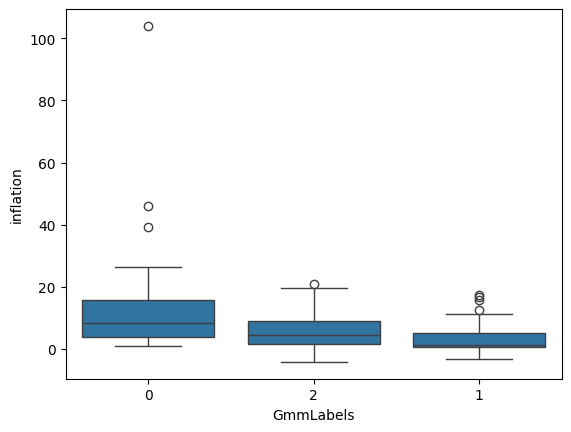

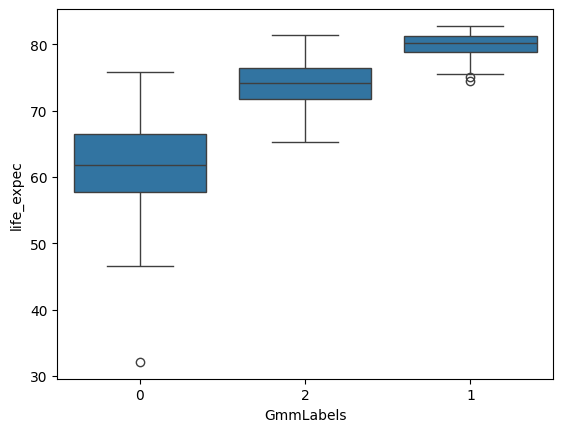

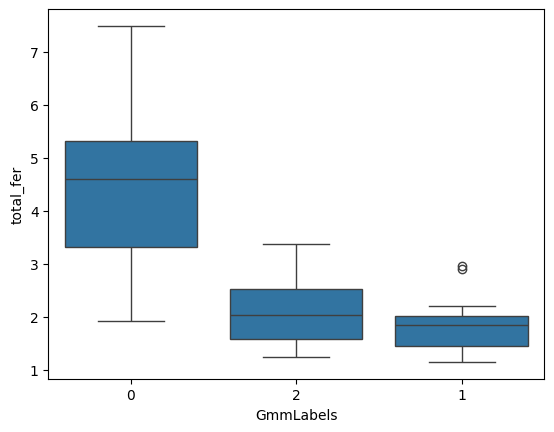

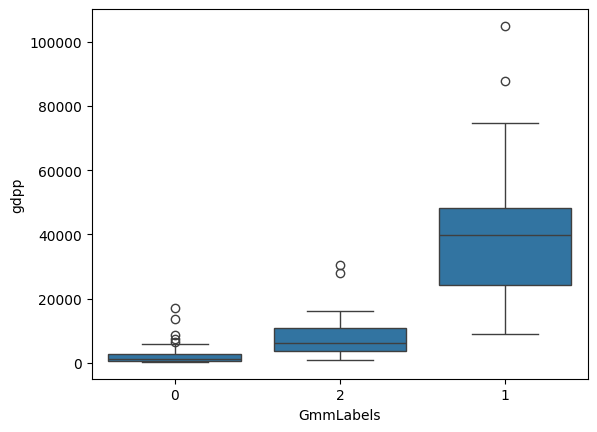

In [55]:
cols_visualise = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']

for col in cols_visualise:
    sns.boxplot(x = 'GmmLabels', y = col, data = data)
    plt.show()

In [56]:
fig = px.scatter_3d(data, x='PC1', y='PC2', z='PC3',
                    color='GmmLabels',
                    text='country',
                    hover_data = ['exports','imports','income'],
                    #size='Absenteeism time in hours',
                    #size_max=50,
                    color_discrete_sequence=['blue','orange','green','black'],
                    height=600,
                    width=900)
fig.show()

### DBSCAN

In [57]:
from sklearn.cluster import DBSCAN


# Creando el modelo DBSCAN
dbscan = DBSCAN(eps=0.1, min_samples=5)  # Puedes ajustar eps y min_samples según tu dataset

# Entrenando el modelo y obteniendo las etiquetas de los clusters
data['DBSCAN_Labels'] = dbscan.fit_predict(data_scaled)
data['DBSCAN_Labels'] = data['DBSCAN_Labels'].astype('str')

In [58]:
data['DBSCAN_Labels'].value_counts()

DBSCAN_Labels
-1    167
Name: count, dtype: int64

Es importante recordar que el valor óptimo de eps puede variar según la distribución y la naturaleza de los datos. Es posible que necesites realizar varios intentos para encontrar el valor más apropiado para tu conjunto de datos específico.

In [59]:
data_scaled

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946
...,...,...,...,...,...,...,...,...
162,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754
163,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678
164,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206
165,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944


In [60]:
data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans_Labels,PC1,PC2,PC3,kmedoLabels,GmmLabels,DBSCAN_Labels
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1,-2.905884,0.158314,-0.909068,2,0,-1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0,0.724072,-0.656184,-0.112554,1,2,-1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0,-0.096809,-0.477845,1.360551,1,2,-1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1,-3.003799,1.787892,1.311144,2,0,-1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0,1.180444,0.083856,-0.069501,1,2,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0,-0.607533,0.612207,-0.284620,1,0,-1
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0,-0.642180,-1.193384,3.103349,2,0,-1
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0,0.884879,1.315037,-0.028810,1,2,-1
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,1,-1.791580,-0.077583,1.078289,2,0,-1


In [61]:
data_pca = data[['PC1','PC2','PC3']]

In [62]:
# Creando el modelo DBSCAN
dbscan = DBSCAN(eps=0.70, min_samples=8)  # Puedes ajustar eps y min_samples según tu dataset

# Entrenando el modelo y obteniendo las etiquetas de los clusters
data['DBSCAN_Labels'] = dbscan.fit_predict(data_pca)
data['DBSCAN_Labels'] = data['DBSCAN_Labels'].astype('str')
data['DBSCAN_Labels'].value_counts()

DBSCAN_Labels
-1    77
0     68
1     15
2      7
Name: count, dtype: int64

In [63]:
fig = px.scatter_3d(data, x='PC1', y='PC2', z='PC3',
                    color='DBSCAN_Labels',
                    text='country',
                    hover_data = ['exports','imports','income'],
                    #size='Absenteeism time in hours',
                    #size_max=50,
                    color_discrete_sequence=['blue','orange','green','black'],
                    height=600,
                    width=900)
fig.show()